In [1]:
!pip3 install matplotlib

In [2]:
!pip3 install sklearn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
data = pd.read_csv('Данные.csv', header = 0)

In [5]:
data.head()

,Компания,Дата,Рейтинг,PD,Денежные средства,Финансовые активы + Депозиты,Итого Активы,Инвестиции в ассоциированные предприятия,Кредиторская задолженность,Итого обязательства,...,Доходность US Treasury 5,Доходность US Treasury 10,Доходность ОФЗ 2,Доходность ОФЗ 5,Доходность ОФЗ 10,Индекс Мосбиржи,ROE,Leverage,Участие АСВ,Кэптивность
0,Алмазная Осень,44104,ruAA,0.142857,1.978310e+08,36090739000,36830089000,0,338000.0,32709571000,...,0.28,0.69,4.28,4.99,6.03,"2.905,81",0.103181,7.938218,1,0
1,Алмазная Осень,43942,ruAA,0.142857,7.487060e+08,33545663000,34914233000,0,2008000.0,32348271000,...,0.34,0.58,5.53,5.78,6.19,"2.488,02",0.054959,12.606684,1,0
2,Алмазная Осень,43614,ruAA,0.142857,7.033770e+08,29843060000,31033100000,0,1428000.0,27854418000,...,2.05,2.25,7.37,7.58,7.91,"2.641,15",0.231275,11.065649,1,0
3,Алмазная Осень,43255,ruAA,0.142857,4.312370e+08,23574359000,25113766000,0,1261000.0,23152350000,...,2.78,2.94,6.67,6.86,7.22,"2.323,64",0.269300,11.684484,1,0
4,Алмазная Осень,42899,ruAA,0.142857,1.043698e+09,17696585000,19315536000,0,282000.0,17851181000,...,1.79,2.21,8.00,7.82,7.64,"1.861,27",0.219727,12.190640,1,0


In [6]:
target = data['PD'].to_numpy()

In [7]:
data = data.drop(labels = ['Компания', 'Дата', 'Рейтинг'], axis = 1)

In [8]:
print(target)

[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.04761905
 0.23809524 0.42857143 0.42857143 0.42857143 0.42857143 0.42857143
 0.42857143 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.23809524 0.23809524 0.23809524 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.23809524 0.42857143 0.42857143 0.76190476
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.0952381  0.14285714 0.14285714
 0.14285714 0.14285714 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.0952381  0.0952381  0.14285714 0.04761905 0.14285714 0.19047619
 0.19047619 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.19047619 0.19047619 0.1904

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   PD                                               192 non-null    float64
 1   Денежные средства                                192 non-null    float64
 2   Финансовые активы + Депозиты                     192 non-null    int64  
 3   Итого Активы                                     192 non-null    int64  
 4   Инвестиции в ассоциированные предприятия         192 non-null    int64  
 5   Кредиторская задолженность                       192 non-null    float64
 6   Итого обязательства                              192 non-null    int64  
 7   Обязательства по договорам / Пенсионные резервы  192 non-null    int64  
 8   Капитал                                          192 non-null    int64  
 9   Прибыль                         

In [10]:
data_with_no_na = data.dropna()
print('Данных с пропусками:', len(data))
print('Данных без пропусков:', len(data_with_no_na))

Данных с пропусками: 192
Данных без пропусков: 172


In [11]:
data_with_no_na['Индекс Мосбиржи'] = data_with_no_na['Индекс Мосбиржи'].str.replace('.', '')
data_with_no_na['Индекс Мосбиржи'] = data_with_no_na['Индекс Мосбиржи'].str.replace(',', '.')

Заполним пропуски в переменных "Итого взносов, Итого выплат"

Эти значения зависят от прибыли. Логичным решением будет пропуски как некоторый средний % от прибыли. Посчитаем средную долю этих переменных в прибыли по всей выборке и заполним пропуски таким образом

In [12]:
contributions = data_with_no_na['Итого Взносов'][data_with_no_na['Итого Взносов'] != 0].to_numpy()
payments = data_with_no_na['Итого выплат'][data_with_no_na['Итого выплат'] != 0].to_numpy()
profits = data_with_no_na['Прибыль'][data_with_no_na['Итого Взносов'] != 0].to_numpy()
contrib_perc = (contributions / profits).mean()
payments_perc = (payments / profits).mean()
print('Доля взносов в прибыли:', (contributions / profits).mean())
print('Доля выплат в прибыли:', (payments / profits).mean()) # выплаты в абсолютном значении

Доля взносов в прибыли: 439.2749395479978
Доля выплат в прибыли: 268.3990998406869


In [13]:
data_with_no_na['Итого Взносов'][data_with_no_na['Итого Взносов'] == 0] = data_with_no_na['Прибыль'][data_with_no_na['Итого Взносов'] == 0] * contrib_perc
data_with_no_na['Итого выплат'][data_with_no_na['Итого выплат'] == 0] = data_with_no_na['Прибыль'][data_with_no_na['Итого выплат'] == 0] * payments_perc

In [14]:
index_text = data_with_no_na.columns

In [15]:
from sklearn import preprocessing

x = data_with_no_na.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_with_no_na = pd.DataFrame(x_scaled)

In [16]:
# Стандартизация убрала имена колонок - переименуем обратно
rename_dict = {}
i = 0
for element in data_with_no_na.columns:
    rename_dict[element] = index_text[i]
    i += 1
data_with_no_na = data_with_no_na.rename(columns=rename_dict)

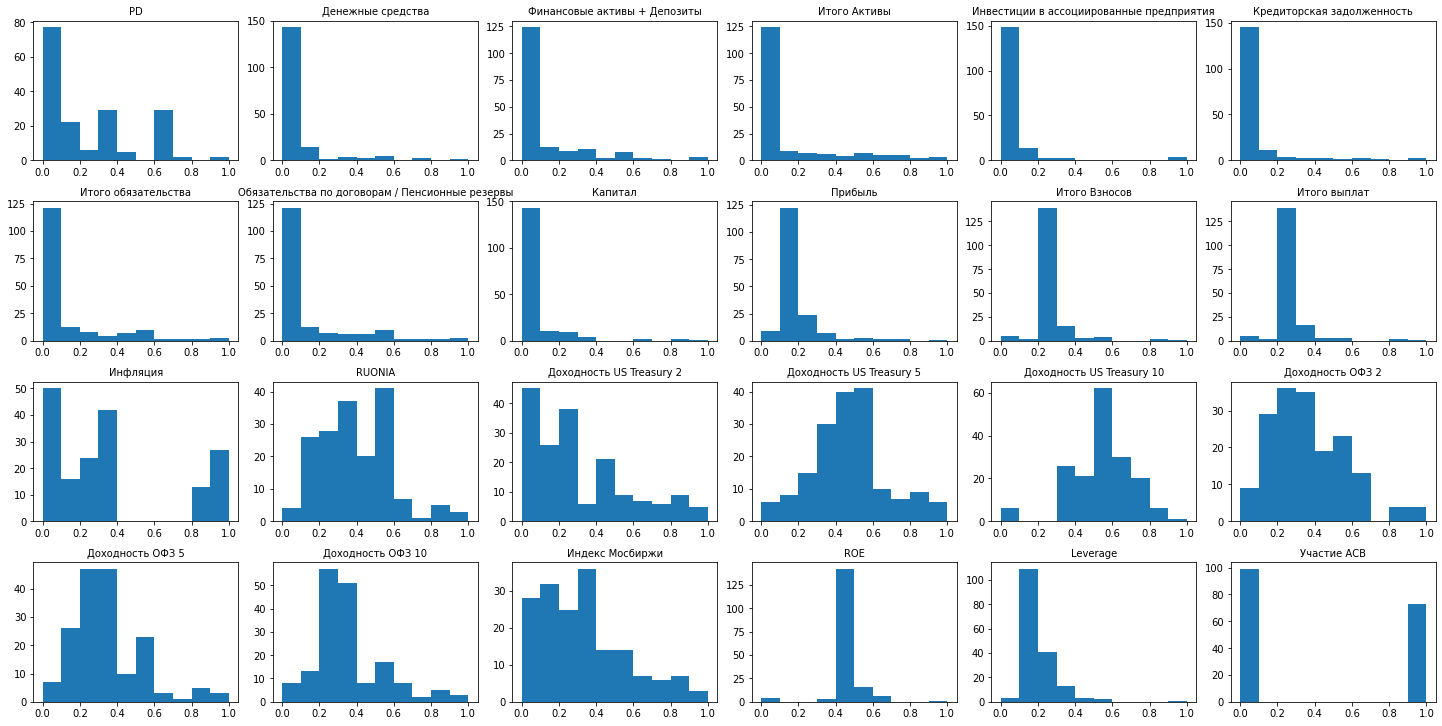

In [17]:
# Построим графики распределения основных переменных
index = data_with_no_na.columns
f, ax = plt.subplots(nrows=4, ncols = 6, figsize = (20, 10))
for i in range(4):
    for j in range(6):
        column_now = index[j + 6 * i]
        ax[i][j].hist(data_with_no_na[column_now], bins = 10)
        ax[i][j].set_title(index_text[j + 6 * i], fontsize = 10)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [18]:
data_with_no_na.head()

,PD,Денежные средства,Финансовые активы + Депозиты,Итого Активы,Инвестиции в ассоциированные предприятия,Кредиторская задолженность,Итого обязательства,Обязательства по договорам / Пенсионные резервы,Капитал,Прибыль,...,Доходность US Treasury 5,Доходность US Treasury 10,Доходность ОФЗ 2,Доходность ОФЗ 5,Доходность ОФЗ 10,Индекс Мосбиржи,ROE,Leverage,Участие АСВ,Кэптивность
0,0.166667,0.004258,0.053702,0.054272,0.0,0.000071,0.050690,0.050837,0.036726,0.146651,...,0.000000,0.036545,0.008679,0.030415,0.080000,0.888123,0.445807,0.154977,1.0,0.0
1,0.166667,0.016196,0.049915,0.051449,0.0,0.000420,0.050129,0.050297,0.025931,0.139464,...,0.021739,0.000000,0.129219,0.103226,0.097778,0.659268,0.444599,0.165363,1.0,0.0
2,0.166667,0.015214,0.044406,0.045730,0.0,0.000299,0.043158,0.042786,0.025592,0.150622,...,0.641304,0.554817,0.306654,0.269124,0.288889,0.743149,0.449014,0.161935,1.0,0.0
3,0.166667,0.009316,0.035078,0.037007,0.0,0.000264,0.035864,0.035748,0.021871,0.149394,...,0.905797,0.784053,0.239151,0.202765,0.212222,0.569225,0.449966,0.163311,1.0,0.0
4,0.166667,0.022589,0.026332,0.028463,0.0,0.000059,0.027640,0.027470,0.018280,0.144035,...,0.547101,0.541528,0.367406,0.291244,0.258889,0.315951,0.448725,0.164437,1.0,0.0


In [19]:
!pip3 install seaborn

<AxesSubplot:>

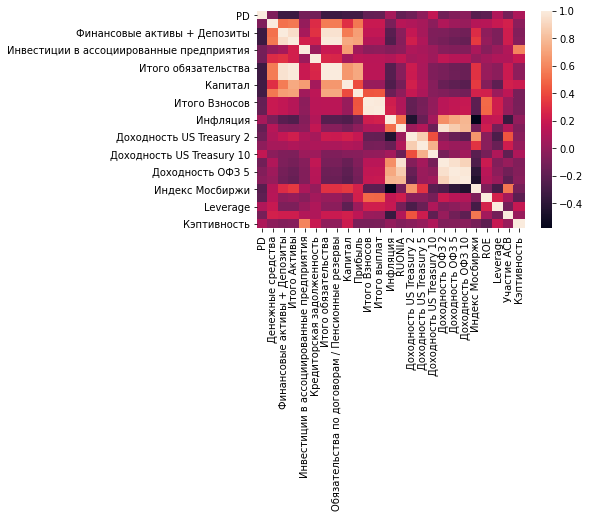

In [20]:
# Посмотрим корреляцию между переменными
import seaborn as sns
correlation_matrix = data_with_no_na.corr()
sns.heatmap(correlation_matrix)

In [21]:
correlation_matrix

,PD,Денежные средства,Финансовые активы + Депозиты,Итого Активы,Инвестиции в ассоциированные предприятия,Кредиторская задолженность,Итого обязательства,Обязательства по договорам / Пенсионные резервы,Капитал,Прибыль,...,Доходность US Treasury 5,Доходность US Treasury 10,Доходность ОФЗ 2,Доходность ОФЗ 5,Доходность ОФЗ 10,Индекс Мосбиржи,ROE,Leverage,Участие АСВ,Кэптивность
PD,1.000000,-0.069761,-0.334793,-0.334893,-0.111097,-0.113317,-0.330255,-0.330610,-0.304943,-0.305930,...,-0.018289,0.175225,-0.122516,-0.057370,-0.030614,-0.222045,-0.196308,0.106928,-0.104234,0.094839
Денежные средства,-0.069761,1.000000,0.528511,0.551083,0.005659,0.290561,0.564931,0.564892,0.312098,0.552936,...,0.072404,-0.026534,0.103711,0.039801,0.010777,0.125137,0.132523,0.194646,0.245612,-0.024135
Финансовые активы + Депозиты,-0.334793,0.528511,1.000000,0.938237,0.066585,0.314909,0.957204,0.957353,0.565151,0.685076,...,0.072051,-0.070664,-0.078478,-0.110999,-0.121320,0.294918,-0.016923,-0.078179,0.224405,-0.061155
Итого Активы,-0.334893,0.551083,0.938237,1.000000,0.238537,0.235064,0.988365,0.988551,0.732998,0.704585,...,0.097311,-0.078319,-0.103861,-0.146038,-0.164588,0.345626,0.009441,-0.080774,0.224941,-0.050730
Инвестиции в ассоциированные предприятия,-0.111097,0.005659,0.066585,0.238537,1.000000,0.028998,0.201371,0.201211,0.682618,0.050136,...,0.074297,0.030092,-0.048072,-0.059159,-0.058746,0.088493,-0.042818,0.024302,0.110905,0.592626
Кредиторская задолженность,-0.113317,0.290561,0.314909,0.235064,0.028998,1.000000,0.275059,0.270372,0.064072,0.150997,...,0.091352,0.041000,0.170524,0.130372,0.123575,0.007592,0.057872,0.098220,0.098678,0.191281
Итого обязательства,-0.330255,0.564931,0.957204,0.988365,0.201371,0.275059,1.000000,0.999930,0.661021,0.725221,...,0.087268,-0.073433,-0.095868,-0.138430,-0.154834,0.319301,0.016873,-0.031199,0.206484,-0.017415
Обязательства по договорам / Пенсионные резервы,-0.330610,0.564892,0.957353,0.988551,0.201211,0.270372,0.999930,1.000000,0.661605,0.726134,...,0.086125,-0.073027,-0.095253,-0.137331,-0.153484,0.316769,0.017045,-0.030993,0.204410,-0.018293
Капитал,-0.304943,0.312098,0.565151,0.732998,0.682618,0.064072,0.661021,0.661605,1.000000,0.403310,...,0.114408,-0.046403,-0.161977,-0.197891,-0.213090,0.348654,-0.052402,-0.197871,0.237320,0.212185
Прибыль,-0.305930,0.552936,0.685076,0.704585,0.050136,0.150997,0.725221,0.726134,0.403310,1.000000,...,0.096582,-0.039503,-0.065304,-0.100558,-0.114392,0.250596,0.237756,0.033994,0.156548,-0.099172


In [22]:
s = correlation_matrix.abs().unstack()
so = s.sort_values(kind="quicksort")
so = so[so != 1.0].round(2)
print('Столбцы с высокой попарной корреляцией:')
print()
print(so[-20:])

Столбцы с высокой попарной корреляцией:

Итого Активы                                     Финансовые активы + Депозиты                       0.94
Финансовые активы + Депозиты                     Итого Активы                                       0.94
Доходность ОФЗ 2                                 Доходность ОФЗ 5                                   0.95
Доходность ОФЗ 5                                 Доходность ОФЗ 2                                   0.95
Финансовые активы + Депозиты                     Итого обязательства                                0.96
Итого обязательства                              Финансовые активы + Депозиты                       0.96
Обязательства по договорам / Пенсионные резервы  Финансовые активы + Депозиты                       0.96
Финансовые активы + Депозиты                     Обязательства по договорам / Пенсионные резервы    0.96
RUONIA                                           Доходность ОФЗ 2                                   0.96
Доходность ОФЗ

**Преобразования:**

* Уберем переменные с итогами, так как они достаточно сильно коррелируют со всем остальным.

* Оставим вместо всех доходностей ОФЗ ставку RUONIA, так как она сильно коррелирует со ставками по ОФЗ.

* Вместо взносов и выплат оставим прибыль, так как она фактически состоит из этих факторов и они коррелируют друг с другом

In [23]:
data_with_no_na = data_with_no_na.drop(
    labels=['Итого Активы', 
    'Итого обязательства', 
    'Итого выплат', 
    'Итого Взносов', 
    'Доходность ОФЗ 2',
    'Доходность ОФЗ 5', 
    'Доходность ОФЗ 10'], 
    axis = 1)

In [24]:
data_with_no_na.head()

,PD,Денежные средства,Финансовые активы + Депозиты,Инвестиции в ассоциированные предприятия,Кредиторская задолженность,Обязательства по договорам / Пенсионные резервы,Капитал,Прибыль,Инфляция,RUONIA,Доходность US Treasury 2,Доходность US Treasury 5,Доходность US Treasury 10,Индекс Мосбиржи,ROE,Leverage,Участие АСВ,Кэптивность
0,0.166667,0.004258,0.053702,0.0,0.000071,0.050837,0.036726,0.146651,0.000000,0.112307,0.000000,0.000000,0.036545,0.888123,0.445807,0.154977,1.0,0.0
1,0.166667,0.016196,0.049915,0.0,0.000420,0.050297,0.025931,0.139464,0.000000,0.244116,0.025180,0.021739,0.000000,0.659268,0.444599,0.165363,1.0,0.0
2,0.166667,0.015214,0.044406,0.0,0.000299,0.042786,0.025592,0.150622,0.060894,0.355750,0.705036,0.641304,0.554817,0.743149,0.449014,0.161935,1.0,0.0
3,0.166667,0.009316,0.035078,0.0,0.000264,0.035748,0.021871,0.149394,0.176974,0.281775,0.859712,0.905797,0.784053,0.569225,0.449966,0.163311,1.0,0.0
4,0.166667,0.022589,0.026332,0.0,0.000059,0.027470,0.018280,0.144035,0.010466,0.440484,0.449640,0.547101,0.541528,0.315951,0.448725,0.164437,1.0,0.0


In [25]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_with_no_na.drop(labels = ['Участие АСВ', 'Кэптивность'], axis = 1)))
print(z)

[[0.25580401 0.43452813 0.34305434 ... 2.39670478 0.16038666 0.51475874]
 [0.25580401 0.35655072 0.36242482 ... 1.41042725 0.17323407 0.40573143]
 [0.25580401 0.36296712 0.3906052  ... 1.77192149 0.12625945 0.44172075]
 ...
 [1.64340273 0.41381626 0.46531574 ... 1.0984792  4.9038783  1.61517454]
 [1.64340273 0.41381626 0.46531574 ... 0.43708143 4.9038783  1.61517454]
 [1.64340273 0.41381626 0.46531574 ... 0.43708143 4.9038783  1.61517454]]


In [26]:
threshold = 3
outliers = np.where(z > threshold)[0]

In [27]:
outliers

array([  0,   1,  12,  23,  28,  29,  33,  33,  34,  34,  35,  35,  36,
        36,  37,  37,  53,  54,  54,  55,  58,  69,  70,  70,  71,  71,
        71,  71,  72,  72,  73,  73,  74,  75,  78,  85, 110, 111, 116,
       117, 119, 119, 162, 163, 164, 168, 169, 170, 171])

In [28]:
print("Количество выбросов:", len(outliers))

Количество выбросов: 49


In [29]:
data_with_no_na.drop(labels = outliers, axis = 0)

,PD,Денежные средства,Финансовые активы + Депозиты,Инвестиции в ассоциированные предприятия,Кредиторская задолженность,Обязательства по договорам / Пенсионные резервы,Капитал,Прибыль,Инфляция,RUONIA,Доходность US Treasury 2,Доходность US Treasury 5,Доходность US Treasury 10,Индекс Мосбиржи,ROE,Leverage,Участие АСВ,Кэптивность
2,0.166667,0.015214,0.044406,0.000000,0.000299,0.042786,0.025592,0.150622,0.060894,0.355750,0.705036,0.641304,0.554817,0.743149,0.449014,0.161935,1.0,0.0
3,0.166667,0.009316,0.035078,0.000000,0.000264,0.035748,0.021871,0.149394,0.176974,0.281775,0.859712,0.905797,0.784053,0.569225,0.449966,0.163311,1.0,0.0
4,0.166667,0.022589,0.026332,0.000000,0.000059,0.027470,0.018280,0.144035,0.010466,0.440484,0.449640,0.547101,0.541528,0.315951,0.448725,0.164437,1.0,0.0
5,0.000000,0.005720,0.018551,0.000000,0.008221,0.017280,0.009937,0.190649,0.284491,0.524546,0.219424,0.315217,0.345515,0.329453,0.649305,0.231853,1.0,0.0
6,0.333333,0.004058,0.017455,0.000000,0.010603,0.015963,0.009069,0.138636,1.000000,0.513786,0.215827,0.496377,0.564784,0.223815,0.462881,0.304093,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.750000,0.109908,0.033143,0.156527,0.283304,0.050451,0.012104,0.153574,0.176974,0.351042,0.913669,0.931159,0.790698,0.567839,0.473660,0.268751,1.0,1.0
161,0.500000,0.126589,0.025258,0.149650,0.348651,0.044283,0.018019,0.144095,0.010466,0.383322,0.442446,0.565217,0.568106,0.386252,0.448911,0.186585,1.0,1.0
165,0.333333,0.037939,0.034657,0.125921,0.025310,0.042219,0.010768,0.145049,0.851570,0.365837,0.158273,0.543478,0.651163,0.079411,0.466904,0.295204,0.0,1.0
166,0.666667,0.014328,0.034657,0.125921,0.025310,0.042258,0.011556,0.213229,0.387250,0.229993,0.086331,0.416667,0.674419,0.062304,0.597548,0.259715,0.0,1.0


Построим модель и найдем **p-value** для переменных 

In [30]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data_with_no_na)

In [31]:
X_train, Y_train = df_train.drop(labels = 'PD', axis = 1), df_train['PD']
X_test, Y_test = df_test.drop(labels = 'PD', axis = 1), df_test['PD']

In [32]:
X, Y = data_with_no_na.drop(labels = 'PD', axis = 1), data_with_no_na['PD']

In [33]:
!pip3 install statsmodels

In [34]:
import statsmodels.api as sm
model = sm.OLS(Y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.576
Model:                            OLS   Adj. R-squared (uncentered):              0.511
Method:                 Least Squares   F-statistic:                              8.941
Date:                Thu, 24 Dec 2020   Prob (F-statistic):                    3.91e-14
Time:                        16:26:59   Log-Likelihood:                          7.4777
No. Observations:                 129   AIC:                                      19.04
Df Residuals:                     112   BIC:                                      67.66
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Денежные средства                                   0.3905      0.191      2.049      0.043       0.013       0.768
Финансовые активы + Депозиты                       -0.6964      0.441     -1.580      0.117      -1.570       0.177
Инвестиции в ассоциированные предприятия            0.0086      0.282      0.031      0.976      -0.551       0.568
Кредиторская задолженность                         -0.1630      0.146     -1.120      0.265      -0.451       0.125
Обязательства по договорам / Пенсионные резервы     0.4157      0.413      1.006      0.317      -0.403       1.234
Капитал                                            -0.5833      0.319     -1.828      0.070      -1.216       0.049
Прибыль                                            -0.2519      0.280     -0.901      0.370      -0.806       0.302
Инфляция                                            0.1534      0.108      1.415      0.160      -0.061       0.368
RUONIA                                             -0.1186      0.180     -0.658      0.512      -0.476       0.238
Доходность US Treasury 2                            0.0507      0.428      0.118      0.906      -0.797       0.898
Доходность US Treasury 5                           -0.8020      0.757     -1.060      0.291      -2.301       0.697
Доходность US Treasury 10                           1.1029      0.495      2.227      0.028       0.121       2.084
Индекс Мосбиржи                                     0.2947      0.177      1.669      0.098      -0.055       0.645
ROE                                                -0.0387      0.316     -0.122      0.903      -0.665       0.588
Leverage                                           -0.2784      0.317     -0.877      0.382      -0.907       0.351
Участие АСВ                                         0.1262      0.059      2.123      0.036       0.008       0.244
Кэптивность                                         0.0877      0.078      1.131      0.261      -0.066       0.241
==============================================================================
Omnibus:                        4.314   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                4.244
Skew:                           0.442   Prob(JB):                        0.120
Kurtosis:                       2.916   Cond. No.                         59.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specif

In [35]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, Y_train)
lin.score(X_test, Y_test)

0.32197100347146423

In [38]:
from sklearn.metrics import mean_squared_error

prediction = lin.predict(X_test)
print(mean_squared_error(prediction, Y_test.to_numpy()))

0.04735018615487801
